In [1]:
import numpy as np
import matplotlib.pyplot as plt

Wilkinson's polynomial is $p_n(x)=(x-1)(x-2)...(x-n) = \prod_{k=1}^n(x - k)$.  The array `a` below is the list of coefficients of $p_{10}(x)$, starting with the coefficient of $x^{10}$ and ending with the constant coefficient.

In [23]:
n = 10
a = np.array([1, -55, 1320, -18150, 157773, -902055,
              3416930,  -8409500,  12753576, -10628640, 3628800], 
              dtype=np.float64)


We can use the function `np.roots()` to find the roots of $p_{10}(x)$.  By default they are listed in decreasing order so we apply `np.flip()` to put them in increasing order.  Of course, because $p_{10}(x)=(x-1)(x-2)(x-3)\dotsb(x-10)$, the roots are just $1,\dotsc,10$.

In [24]:
np.flip(np.roots(a))

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

We now consider the roots of $p_{10}(x)+\epsilon x^9$, for various values of $\epsilon$.  Even when $\epsilon$ is quite small, we see that the roots are significantly different from those of $p_{10}(x)$ itself.

In [28]:
epsilon = 1e-5
b = a.copy()
b[1] = a[1] + epsilon # NB b[0] is the coefficient of x^10, b[1] is the coefficient of x^9
print(b)
np.flip(np.roots(b))

[ 1.0000000e+00 -5.4999990e+01  1.3200000e+03 -1.8150000e+04
  1.5777300e+05 -9.0205500e+05  3.4169300e+06 -8.4095000e+06
  1.2753576e+07 -1.0628640e+07  3.6288000e+06]


array([1.        , 1.99999987, 3.00001953, 3.99939424, 5.006876  ,
       5.96645154, 7.10135021, 7.86415124, 9.09091805, 9.97082931])

To explore this further we plot the roots of $p_{10}(x)+\epsilon x^9$ for various values of $\epsilon$.

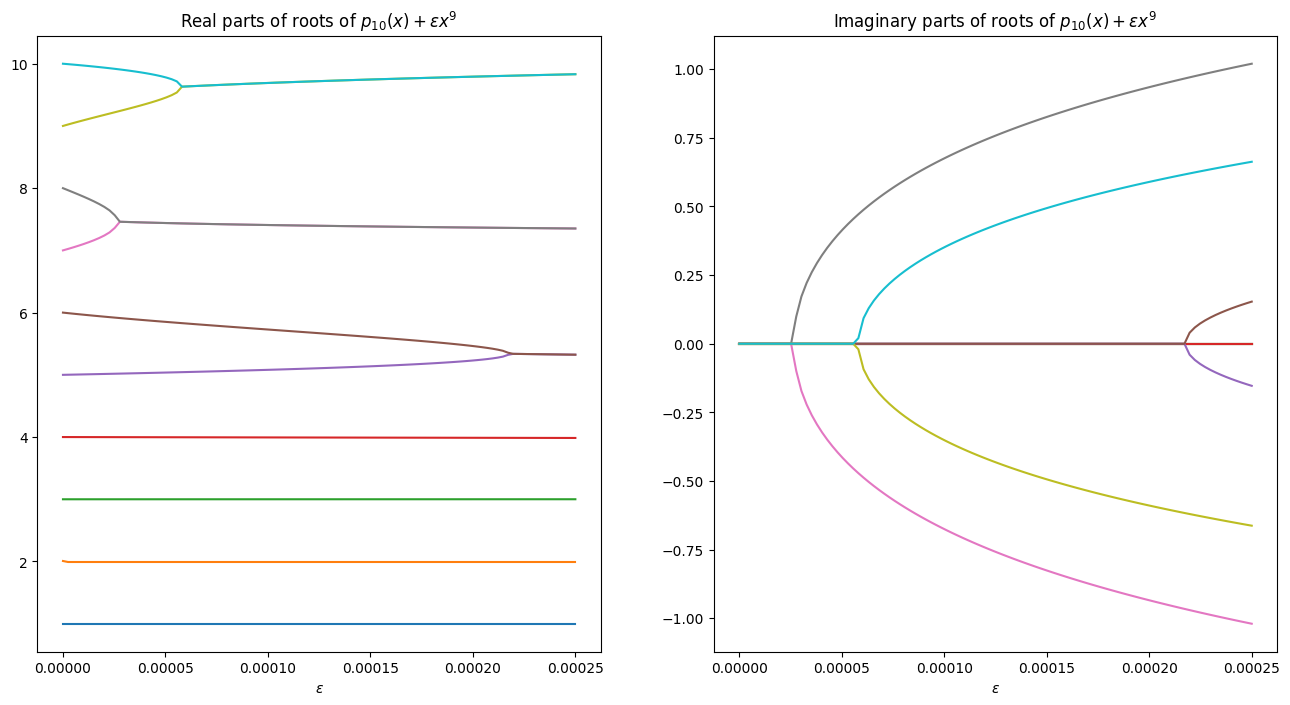

In [37]:
M = 100
ee = np.linspace(0, 2.5e-4, M)
b = a.copy()
r = np.zeros((n, M), dtype=np.complex128)
for i in range(M):
    epsilon = ee[i]
    b[1] = a[1] + epsilon
    r[:,i] = np.flip(np.roots(b))

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_xlabel(r'$\epsilon$')
ax[0].set_title(r'Real parts of roots of $p_{10}(x)+\epsilon x^9$')
ax[1].set_xlabel(r'$\epsilon$')
ax[1].set_title('Imaginary parts of roots of $p_{10}(x)+\epsilon x^9$')
for j in range(n):
    ax[0].plot(ee, r[j,:].real, '-')
    ax[1].plot(ee, r[j,:].imag, '-')